# Clasificación de Supernovas usando Random Forest
## usando los datos del extraidos del notebook SN_feature_extraction

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import time
inicio_ejecucion = time.time()

In [3]:
import pandas as pd
url_features_clean_smote='https://raw.githubusercontent.com/joaquinzepeda/Datos/main/datos%20supernovas/features_clean_smote.csv'
features_clean_smote = pd.read_csv(url_features_clean_smote, index_col=None)
features_clean_smote

,delta_mag_fid_1,positive_fraction_1,delta_mag_fid_2,positive_fraction_2,Multiband_period,PPE,Period_band_1,delta_period_1,Period_band_2,delta_period_2,...,SmallKurtosis_2,Std_2,StetsonK_2,Pvar_2,ExcessVar_2,SF_ML_amplitude_2,SF_ML_gamma_2,IAR_phi_2,LinearTrend_2,ClassALeRCE
0,2.244800,1.0,1.847730,1.0,51.630429,0.018797,0.200240,51.430189,0.069774,51.560655,...,1.142780,0.466788,0.893531,1.000000,0.000594,1.874733,0.348850,0.838971,0.001989,SNIa
1,0.495977,1.0,0.786995,1.0,0.156563,0.004384,0.165508,0.008945,0.185710,0.029147,...,2.497958,0.212669,0.743787,0.999385,0.000068,6.512830,0.948480,0.924340,0.017806,SNIbc
2,3.293953,1.0,2.170098,1.0,1.005344,0.056146,0.065053,0.940291,999.999953,998.994608,...,-0.621467,0.662524,0.917680,1.000000,0.001411,8.845398,0.926170,0.988949,0.027800,SNIIn
3,1.371363,1.0,0.797367,1.0,1.028361,0.034737,1.029866,0.001505,37.037036,36.008675,...,-0.743503,0.238186,0.886096,1.000000,0.000121,0.144780,-0.214761,0.899290,0.008069,SNIa
4,0.728745,1.0,1.682007,1.0,0.117252,0.008665,0.159770,0.042518,0.183438,0.066186,...,-0.604936,0.542122,0.865536,1.000000,0.000816,0.185903,-0.458004,0.690001,0.012075,SNIa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6991,1.834150,1.0,1.763415,1.0,85.014707,0.025007,0.146647,84.868060,76.695999,8.318709,...,-1.271869,0.615246,0.936865,1.000000,0.000985,12.231234,1.130425,0.977872,0.021137,SNIbc
6992,1.484125,1.0,1.549673,1.0,58.885080,0.087359,0.169465,58.715615,60.456962,1.571882,...,-1.372308,0.517632,0.928139,1.000000,0.000681,9.421385,0.872538,0.980311,0.036762,SNIbc
6993,1.623183,1.0,1.157998,1.0,56.541414,0.046717,65.906366,45.125617,31.716621,24.824793,...,-0.790042,0.360607,0.826086,1.000000,0.000299,2.582443,0.527793,0.921288,0.007377,SNIbc
6994,2.802999,1.0,2.802781,1.0,55.388475,0.070948,497.362846,551.615628,303.538554,248.150079,...,-0.293264,0.744054,0.855970,1.000000,0.001775,5.035447,0.824624,0.989714,0.020814,SNIbc



# Separación del conjunto en ENTRENAMIENTO y TEST:

Dividiremos el conjunto en 70% para entrenamiento y 30% para test


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder # se codifica la clase
le = LabelEncoder()


X, y = features_clean_smote.iloc[:,:-1], features_clean_smote['ClassALeRCE']
# label encode the target variable
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
y_sin_codificar = le.inverse_transform(y)
np.unique(y),np.unique(y_sin_codificar)
df = pd.DataFrame()
df['ClassALeRCE']=np.unique(y_sin_codificar)
df['Codificación']=np.unique(y)
df

,ClassALeRCE,Codificación
0,SLSN,0
1,SNII,1
2,SNIIb,2
3,SNIIn,3
4,SNIa,4
5,SNIbc,5


In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
classifier = RandomForestClassifier()
#-----------------------ENTRENAMIENTO-----------------------------------------
classifier.fit(X_train,y_train)

#------------------SE PRUEBA EL CLASIFICADOR----------------------------------
# predict new data:
#pues solo usaremos el target para comprobar la eficacia de la predicción

pred_labels = classifier.predict(X_test)

In [8]:
# calculate accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, pred_labels)

0.978273299028016

# Classification accuracy is 97.78%

Text(120.5, 0.5, 'True Label')

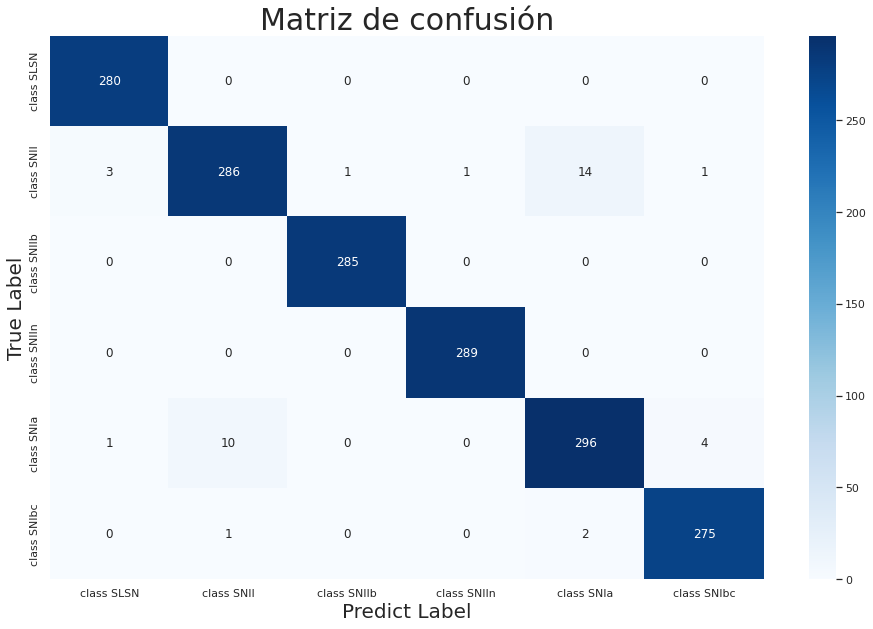

In [15]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sn

columns = ['class %s' %(i) for i in np.unique(y_sin_codificar)]

confm = confusion_matrix(y_test, pred_labels)
df_cm = pd.DataFrame(confm, index=columns, columns=columns)
ax = sn.heatmap(df_cm, cmap='Blues',fmt='.3g', annot=True)
sn.set(rc={'figure.figsize':(16,10)})
ax.set_title('Matriz de confusión',fontsize=30)
ax.set_xlabel('Predict Label',fontsize=20)
ax.set_ylabel('True Label',fontsize=20)

In [10]:
fin = time.time()

In [16]:
tiempo_de_extraccion = (fin-inicio_ejecucion)/60
print(f'La clasificación se demoro {"{:.2f}".format(tiempo_de_extraccion)} minutos')

La clasificación se demoro 1.12 minutos


# Importancia de las caracteristicas

In [13]:
import matplotlib.pyplot as plt
importance = classifier.feature_importances_

# resumimos las importancias de las caracteristicas y graficamos
for i,v in enumerate(importance):
    print('Feature: %0d, Score:%5f'%(i,v))


Feature: 0, Score:0.007297
Feature: 1, Score:0.000587
Feature: 2, Score:0.006796
Feature: 3, Score:0.000901
Feature: 4, Score:0.013961
Feature: 5, Score:0.015917
Feature: 6, Score:0.019093
Feature: 7, Score:0.009334
Feature: 8, Score:0.011327
Feature: 9, Score:0.006667
Feature: 10, Score:0.022162
Feature: 11, Score:0.009622
Feature: 12, Score:0.028362
Feature: 13, Score:0.010977
Feature: 14, Score:0.012514
Feature: 15, Score:0.015366
Feature: 16, Score:0.006988
Feature: 17, Score:0.014226
Feature: 18, Score:0.007815
Feature: 19, Score:0.009587
Feature: 20, Score:0.015169
Feature: 21, Score:0.006643
Feature: 22, Score:0.015432
Feature: 23, Score:0.012269
Feature: 24, Score:0.007078
Feature: 25, Score:0.007262
Feature: 26, Score:0.008103
Feature: 27, Score:0.007058
Feature: 28, Score:0.011459
Feature: 29, Score:0.010135
Feature: 30, Score:0.007793
Feature: 31, Score:0.006715
Feature: 32, Score:0.006070
Feature: 33, Score:0.009755
Feature: 34, Score:0.006271
Feature: 35, Score:0.005857
Fe

<BarContainer object of 104 artists>

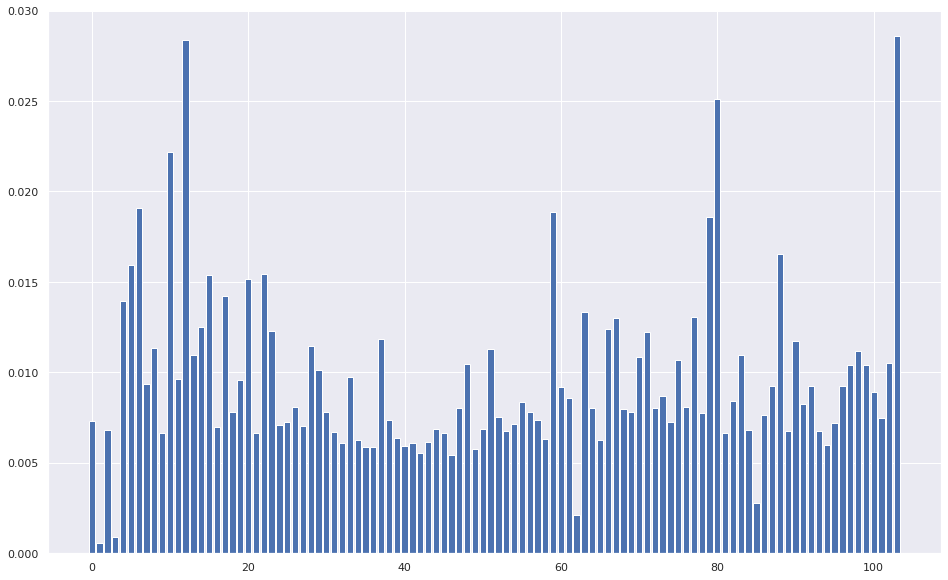

In [14]:
# FALTA AGREGARLE LOS NOMBRES DE LAS CARACTERISTICAS
plt.bar([x for x in range(len(importance))],importance)